### GI data

In [35]:
import os # this allows simple navigation of folders in the notebook
import pandas as pd # this loads Pandas
import numpy as np # This loads NumPy, used to do maths in the notebook
from ebmdatalab import bq # this loads the bennett institute bigquery function
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Define function

def bnf_code_filter(df, bnf_code, part_code, excluded_part_code=None):
    # Filter by included prefixes. returns true if it starts with the included prefixes.
    included_bnf_codes = df[bnf_code].str.startswith(tuple(part_code))
    
    # If there are excluded prefixes, filter those out. returns true if containing excluded prefixes, which are then inverted to false.
    if excluded_part_code:
        excluded_bnf_code = ~df[bnf_code].str.startswith(tuple(excluded_part_code))
    else:
        excluded_bnf_code = True  # No exclusion, so all are included.

    # Apply both filters. only true if both the included are true.
    filtered_df = df[included_bnf_codes & excluded_bnf_code]
    
    return filtered_df


#### Load datasets

- gi_df: prescribing data, for 0101 and 0103 of the BNF, from 2019-01 to 2024-05
- bnf_df: hierarchical data for legacy bnf codes and names
- practice_df: practice info, including setting code (4=GP practice)
- statistics_df: practice list sizes per month
- ccg_df: CCG/SICBL information

In [37]:
# Load prescribing data from compressed csv chunks
file_pattern = os.path.join("..","data","omep_df_chunk_*.csv.gz") #creates a file path
file_names = glob.glob(file_pattern) # List all files matching the pattern
gi_df = pd.concat([pd.read_csv(file, compression='gzip') for file in file_names], ignore_index=True) # Load each compressed CSV file (decompressing them) into a DataFrame and concatenate them. This is a list comprehension.
bnf_df = pd.read_csv(os.path.join("..","data","bnf_df.csv")) #pd.read_csv is the function that loads it into the DataFrame
practices_df = pd.read_csv(os.path.join("..","data","practices_df.csv"))
statistics_df = pd.read_csv(os.path.join("..","data","statistics_df.csv"))
ccg_df = pd.read_csv(os.path.join("..","data","ccg_df.csv"))

In [4]:
gi_df.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2023-04-01,36L,H83611,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,280.0,27.20,25.70305
1,2023-04-01,B2M3M,M86001,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,252.0,24.48,23.14266
2,2023-04-01,W2U3Z,E85696,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,140.0,13.60,12.91352
3,2023-04-01,99F,F81061,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,258.0,25.06,23.80102
4,2023-04-01,15E,M85164,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,364.0,35.36,33.39660


In [91]:
practices_df.head()

,code,name,address1,address2,address3,address4,address5,postcode,location,ccg_id,pcn_id,setting,close_date,join_provider_date,leave_provider_date,open_date,status_code
0,01Y999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1,09X999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
2,NHT999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
3,04R999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
4,04E999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN


In [92]:
ccg_df.head()

,code,name,ons_code,org_type,open_date,close_date,address,postcode,stp_id,regional_team_id
0,RYG,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,RYY,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,RYW,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,NYF,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,NCN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bnf_df.head()

,chapter,chapter_code,section,section_code,para,para_code,subpara,subpara_code,chemical,chemical_code,product,product_code,presentation,presentation_code
0,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Other antacid and simeticone preparations,010101000,Proprietary compound preparation BNF 0101010,010101000BB,Indigestion mixture,010101000BBAJA0
1,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Alexitol sodium,0101010A0AA,Alexitol sodium 360mg tablets,0101010A0AAAAAA
2,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Actal,0101010A0BB,Actal 360mg tablets,0101010A0BBAAAA
3,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide 475mg capsules,0101010C0AAAAAA
4,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide oral suspension sugar free,0101010C0AAACAC


#### Items Graphs

In [40]:
ranitidine_code = ['0103010T0']
ranitidine_exclude_codes = ['0103010T0AAADAD', '0103010T0BBADAD']

In [41]:
data_filtered_ranitidine = bnf_code_filter(gi_df, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)
print(data_filtered_ranitidine)

               month    pct practice  \
666171    2019-02-01    05G   M83089   
666172    2019-02-01    27D   N81087   
666173    2019-02-01    91Q   G82057   
666174    2019-02-01    00V   P83011   
666175    2019-02-01    01J   N83043   
...              ...    ...      ...   
12909531  2019-03-01    15E   Y03835   
12909532  2019-03-01    15E   M85730   
12909533  2019-03-01    99E   F81186   
12909534  2019-03-01    36L   H85022   
12909535  2019-03-01  A3A8R   F84686   

                                              bnf_name         bnf_code  \
666171    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666172    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666173    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666174    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666175    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
...                                                ...              .

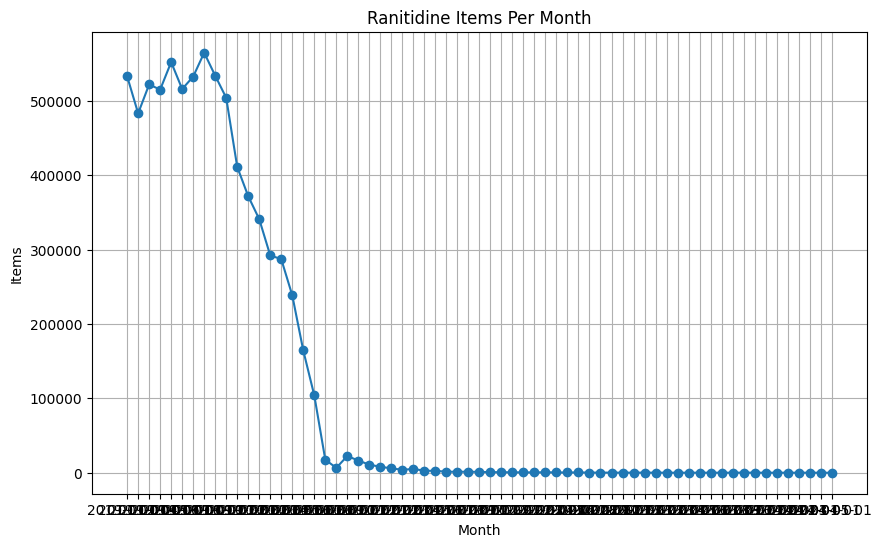

In [19]:
ranitidine_monthly_totals = data_filtered_ranitidine.groupby('month')['items'].sum().reset_index()#grouping dataset by month. the resulting data set has 2 columns, months and items.

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o') #3 things, x axis define, y axis define, and marker.

# Add titles and labels
plt.title('Ranitidine Items Per Month')
plt.xlabel('Month')
plt.ylabel('Items')

# Show the plot
plt.grid(True)
plt.show()

In [63]:
alternative_H2RA = ['0103010H0', '0103010N0', '0103010D0']
alternative_H2RA_exclude_codes = ['0103010D0AAAEAE', '0103010D0BBAEAE', '0103010N0BBACAC', '0103010N0AAACAC']

In [64]:
data_filtered_alternative_H2RA = bnf_code_filter(gi_df, 'bnf_code', alternative_H2RA, alternative_H2RA_exclude_codes)

In [11]:
H2RA_monthly_totals = data_filtered_alternative_H2RA.groupby('month')['items'].sum().reset_index()

print(H2RA_monthly_totals)

         month   items
0   2019-01-01    4640
1   2019-02-01    4171
2   2019-03-01    4475
3   2019-04-01    4382
4   2019-05-01    4646
..         ...     ...
60  2024-01-01  257052
61  2024-02-01  247258
62  2024-03-01  255719
63  2024-04-01  269714
64  2024-05-01  282042

[65 rows x 2 columns]


In [65]:
PPI_code = ['0103050E0', '0103050L0', '0103050P0', '0103050R0', '0103050T0']
PPI_exclude_codes = ['0103050E0AAACAC', '0103050E0BBACAC', '0103050P0BBAHBG', '0103050P0BBAGAV', '0103050P0AABGBG', '0103050P0AAAVAV', '0103050R0AAACAC', '0103050R0BBACAC']

In [44]:
antacids_code = ['010101', '0101021C0AA', '010102100BBAXA0', '0101021C0BNAAAF', '0101021C0BJABAF', '0101021C0BJAAAF', '0101021C0BBAAAF']
antacids_exclude_codes = ['0101010F0AABABA', '0101010F0AABCBC', '0101010F0AABBBB', '0101010F0AAAXAX', '0101010F0AAAVAV', '0101010F0AAAZAZ', '0101010F0AAAYAY', '0101010F0AAAWAW', '0101010F0AABDBD', '0101010J0AAAIAI', '0101010J0AAAJAJ', '0101010J0AAAKAK', '010101000BB', '010101000BBAJA0', '010101200AA', '010101200AAABAB', '010101200AAACAC']

In [66]:
data_filtered_PPI = bnf_code_filter(gi_df, 'bnf_code', PPI_code, PPI_exclude_codes)
print(data_filtered_PPI)

               month    pct practice  \
0         2023-04-01    36L   H83611   
1         2023-04-01  B2M3M   M86001   
2         2023-04-01  W2U3Z   E85696   
3         2023-04-01    99F   F81061   
4         2023-04-01    15E   M85164   
...              ...    ...      ...   
13253511  2023-11-01    00Y   Y02827   
13253512  2023-11-01    15E   M85048   
13253513  2023-08-01    00N   A88002   
13253514  2023-08-01    15F   B86104   
13253515  2023-08-01    07K   D83075   

                                           bnf_name         bnf_code  items  \
0         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
1         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
2         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
3         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
4         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
...                                          

In [45]:
data_filtered_antacids = bnf_code_filter(gi_df, 'bnf_code', antacids_code, antacids_exclude_codes)

In [17]:
PPI_monthly_totals = data_filtered_PPI.groupby('month')['items'].sum().reset_index()

In [13]:
antacids_monthly_totals = data_filtered_antacids.groupby('month')['items'].sum().reset_index()

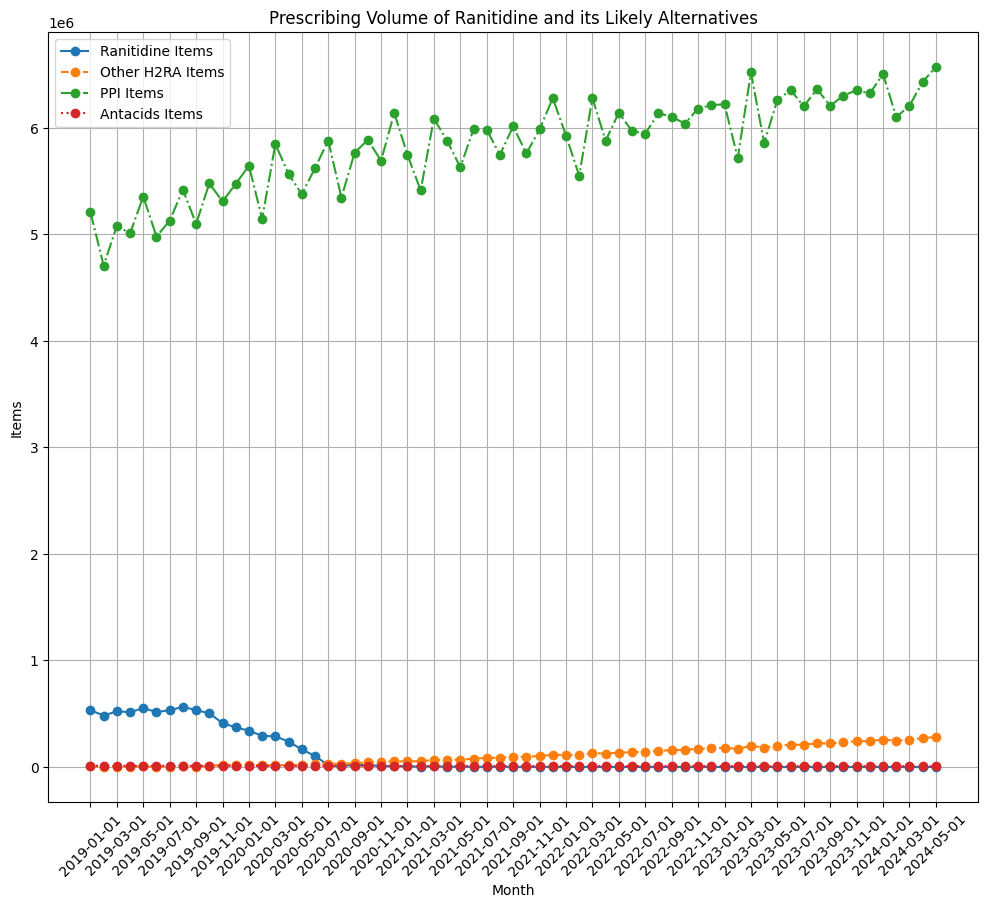

In [17]:
# Create matplotlib graph - Monthly items for all 3 classes + rantidine

plt.figure(figsize=(12, 10))

# Plot monthly totals for ranitidine
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o', label='Ranitidine Items')

# Plot monthly totals for Alternative H2RA chemicals
plt.plot(H2RA_monthly_totals['month'], H2RA_monthly_totals['items'], marker='o', linestyle='--', label='Other H2RA Items')

#Plot monthly totals for PPIs
plt.plot(PPI_monthly_totals['month'], PPI_monthly_totals['items'], marker='o', linestyle='-.', label='PPI Items')

#Plot monthly totals for antacids
plt.plot(antacids_monthly_totals['month'], antacids_monthly_totals['items'], marker='o', linestyle=':', label='Antacids Items')

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Adding a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

#Specifying x ticks 
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Display the plot
plt.show()

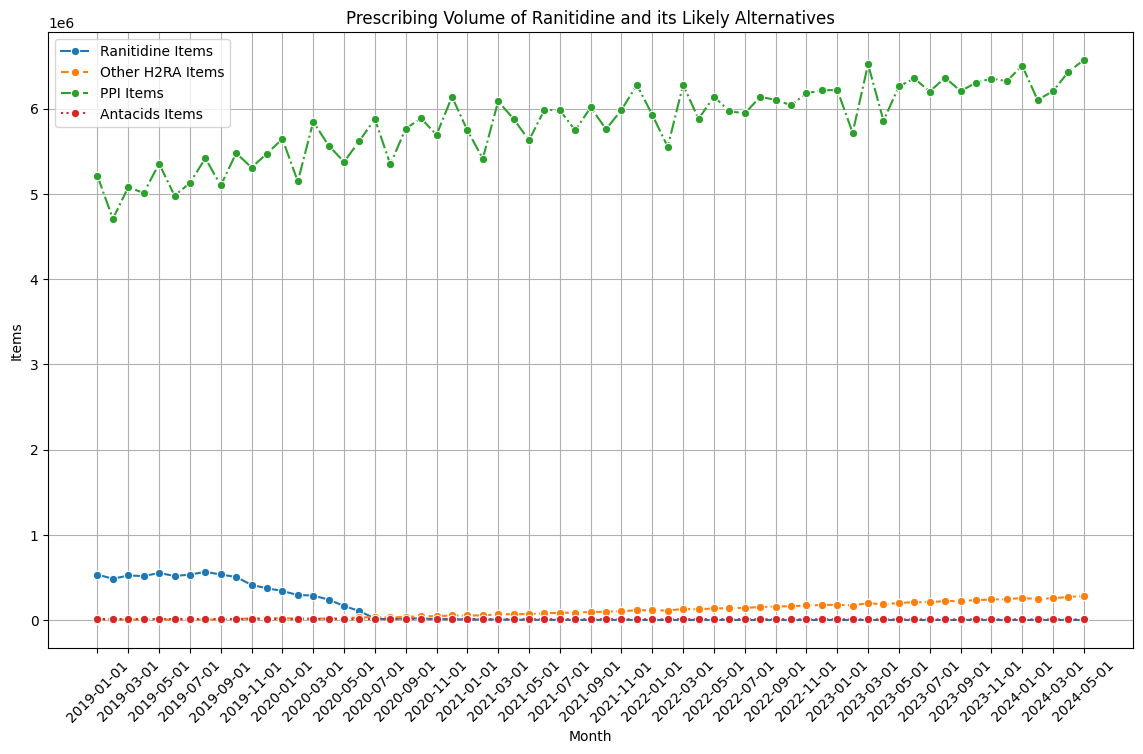

In [18]:
# Create a Seaborn figure for all 3 classes + ranitidine
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')
 
# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Other H2RA Items')

#Plot monthly totals for PPIs
sns.lineplot(data=PPI_monthly_totals, x='month', y='items', marker='o', linestyle='-.', label='PPI Items')

#Plot monthly totals for antacids 
sns.lineplot(data=antacids_monthly_totals, x='month', y='items', marker='o', linestyle=':', label='Antacids Items')

 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

In [42]:
#Codes for Alternative H2RAs.

cimetidine_codes = ['0103010D0']
cimetidine_exclude_codes = ['0103010D0AAAEAE', '0103010D0BBAEAE']

famotidine_codes = ['0103010H0']

nizatidine_codes = ['0103010N0']
nizatidine_exclude_codes = ['0103010N0BBACAC', '0103010N0AAACAC']

#Apply bnf_code_filter
data_filtered_cimetidine = bnf_code_filter(gi_df, 'bnf_code', cimetidine_codes, cimetidine_exclude_codes)
data_filtered_famotidine = bnf_code_filter(gi_df, 'bnf_code', famotidine_codes)
data_filtered_nizatidine = bnf_code_filter(gi_df, 'bnf_code', nizatidine_codes, nizatidine_exclude_codes)

In [15]:
print(data_filtered_famotidine)

               month    pct practice                 bnf_name  \
1143427   2022-02-01    03W   C82611  Famotidine 20mg tablets   
1143428   2022-02-01    11J   J81045  Famotidine 20mg tablets   
1143429   2022-02-01    14Y   K82045  Famotidine 20mg tablets   
1143430   2022-02-01    15E   M85136  Famotidine 20mg tablets   
1143431   2022-02-01    15E   M89016  Famotidine 20mg tablets   
...              ...    ...      ...                      ...   
12831075  2019-03-01    91Q   G82160  Famotidine 40mg tablets   
12831076  2019-03-01    15A   K81022  Famotidine 40mg tablets   
12831077  2019-03-01    15F   B86093  Famotidine 40mg tablets   
12831078  2019-03-01    15N   L83069  Famotidine 40mg tablets   
12831079  2019-03-01  X2C4Y   B85008  Famotidine 40mg tablets   

                 bnf_code  items  quantity  net_cost  actual_cost  
1143427   0103010H0AAAAAA      6     284.0    173.66    162.75477  
1143428   0103010H0AAAAAA      6     224.0    132.40    124.02718  
1143429   01030

In [16]:
#Grouping items by month.
cimetidine_monthly_totals = data_filtered_cimetidine.groupby('month')['items'].sum().reset_index()
famotidine_monthly_totals = data_filtered_famotidine.groupby('month')['items'].sum().reset_index()
nizatidine_monthly_totals = data_filtered_nizatidine.groupby('month')['items'].sum().reset_index()

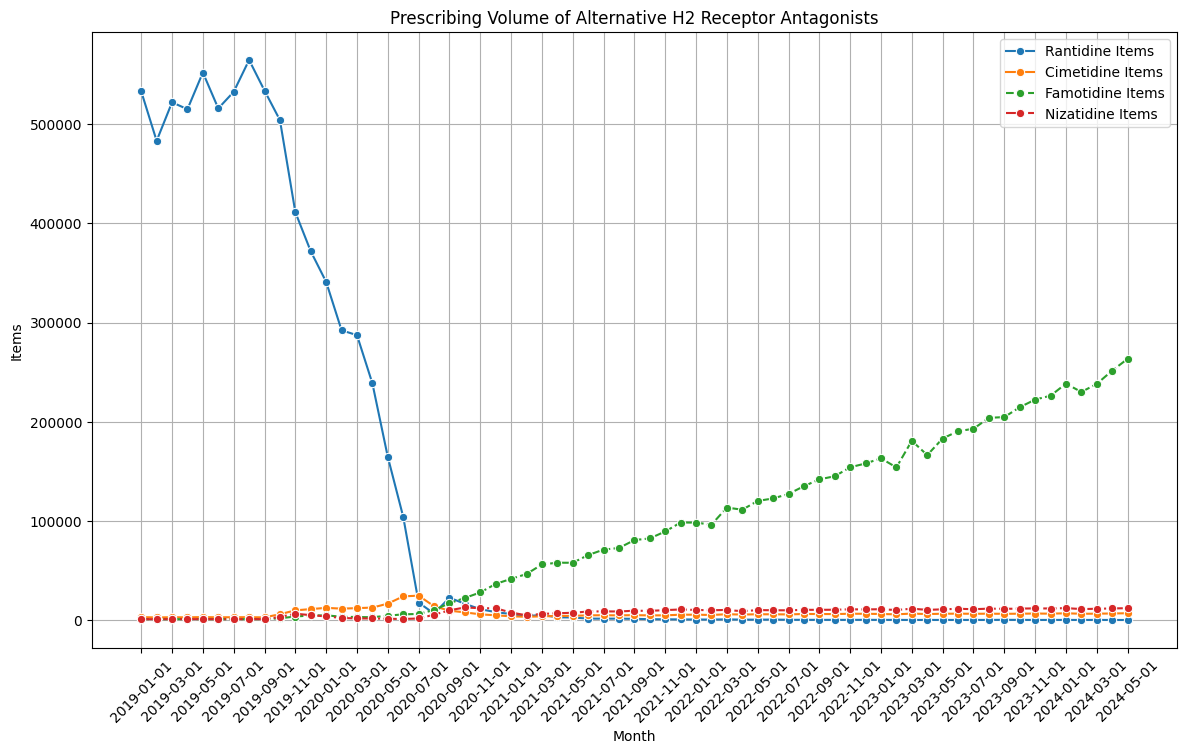

In [22]:
# Create a Seaborn figure for specific H2RA antagonists
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for H2RA antagonists using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Rantidine Items')

sns.lineplot(data=cimetidine_monthly_totals, x='month', y='items', marker='o', label='Cimetidine Items')
 
sns.lineplot(data=famotidine_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Famotidine Items')

sns.lineplot(data=nizatidine_monthly_totals, x='month', y='items', marker='o', linestyle='-.', label='Nizatidine Items')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Prescribing Volume of Alternative H2 Receptor Antagonists')
plt.xlabel('Month')
plt.ylabel('Items')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

In [43]:
#Codes for PPIs.

esomeprazole_codes = ['0103050E0']
esomeprazole_exclude_codes = ['0103050E0AAACAC', '0103050E0BBACAC']

lansoprazole_codes = ['0103050L0']

omeprazole_codes = ['0103050P0']
omeprazole_exclude_codes = ['0103050P0BBAHBG', '0103050P0BBAGAV', '0103050P0AABGBG', '0103050P0AAAVAV']

pantoprazole_codes = ['0103050R0']
pantoprazole_exclude_codes = ['0103050R0AAACAC', '0103050R0BBACAC']

rabeprazole_codes = ['0103050T0']

#Apply bnf_code_filter
data_filtered_esomeprazole = bnf_code_filter(gi_df, 'bnf_code', esomeprazole_codes, esomeprazole_exclude_codes)
data_filtered_lansoprazole = bnf_code_filter(gi_df, 'bnf_code', lansoprazole_codes)
data_filtered_omeprazole = bnf_code_filter(gi_df, 'bnf_code', omeprazole_codes, omeprazole_exclude_codes)
data_filtered_pantoprazole = bnf_code_filter(gi_df, 'bnf_code', pantoprazole_codes, pantoprazole_exclude_codes)
data_filtered_rabeprazole = bnf_code_filter(gi_df, 'bnf_code', rabeprazole_codes)

In [24]:
#Grouping items by month.
esomeprazole_monthly_totals = data_filtered_esomeprazole.groupby('month')['items'].sum().reset_index()
lansoprazole_monthly_totals = data_filtered_lansoprazole.groupby('month')['items'].sum().reset_index()
omeprazole_monthly_totals = data_filtered_omeprazole.groupby('month')['items'].sum().reset_index()
pantoprazole_monthly_totals = data_filtered_pantoprazole.groupby('month')['items'].sum().reset_index()
rabeprazole_monthly_totals = data_filtered_rabeprazole.groupby('month')['items'].sum().reset_index()

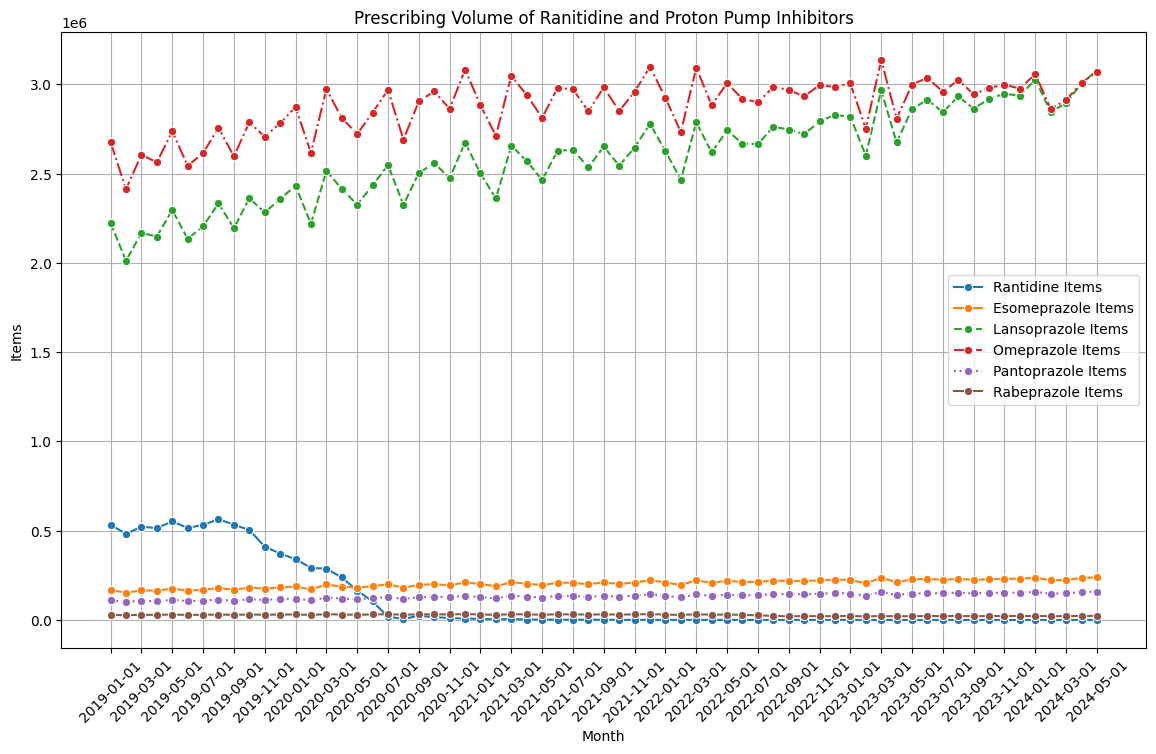

In [25]:
#Create a Seaborn Figure for Specific PPIs
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for PPIs using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Rantidine Items')

sns.lineplot(data=esomeprazole_monthly_totals, x='month', y='items', marker='o', label='Esomeprazole Items')
 
sns.lineplot(data=lansoprazole_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Lansoprazole Items')

sns.lineplot(data=omeprazole_monthly_totals, x='month', y='items', marker='o', linestyle='-.', label='Omeprazole Items')

sns.lineplot(data=pantoprazole_monthly_totals, x='month', y='items', marker='o', linestyle=':', label='Pantoprazole Items')

sns.lineplot(data=rabeprazole_monthly_totals, x='month', y='items', marker='o', linestyle='-', label='Rabeprazole Items')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and Proton Pump Inhibitors')
plt.xlabel('Month')
plt.ylabel('Items')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

#### Cost Graphs

In [17]:
#Collate Monthly Cost Data
ranitidine_monthly_cost = data_filtered_ranitidine.groupby('month')['actual_cost'].sum().reset_index()
alternative_H2RA_monthly_cost = data_filtered_alternative_H2RA.groupby('month')['actual_cost'].sum().reset_index()
PPI_monthly_cost = data_filtered_PPI.groupby('month')['actual_cost'].sum().reset_index()
antacids_monthly_cost = data_filtered_antacids.groupby('month')['actual_cost'].sum().reset_index()

print (ranitidine_monthly_cost)

         month   actual_cost
0   2019-01-01  743623.97425
1   2019-02-01  673441.11769
2   2019-03-01  730181.58266
3   2019-04-01  730210.06318
4   2019-05-01  787721.29312
..         ...           ...
60  2024-01-01     514.37915
61  2024-02-01     187.99284
62  2024-03-01     393.79345
63  2024-04-01     120.30642
64  2024-05-01      20.96213

[65 rows x 2 columns]


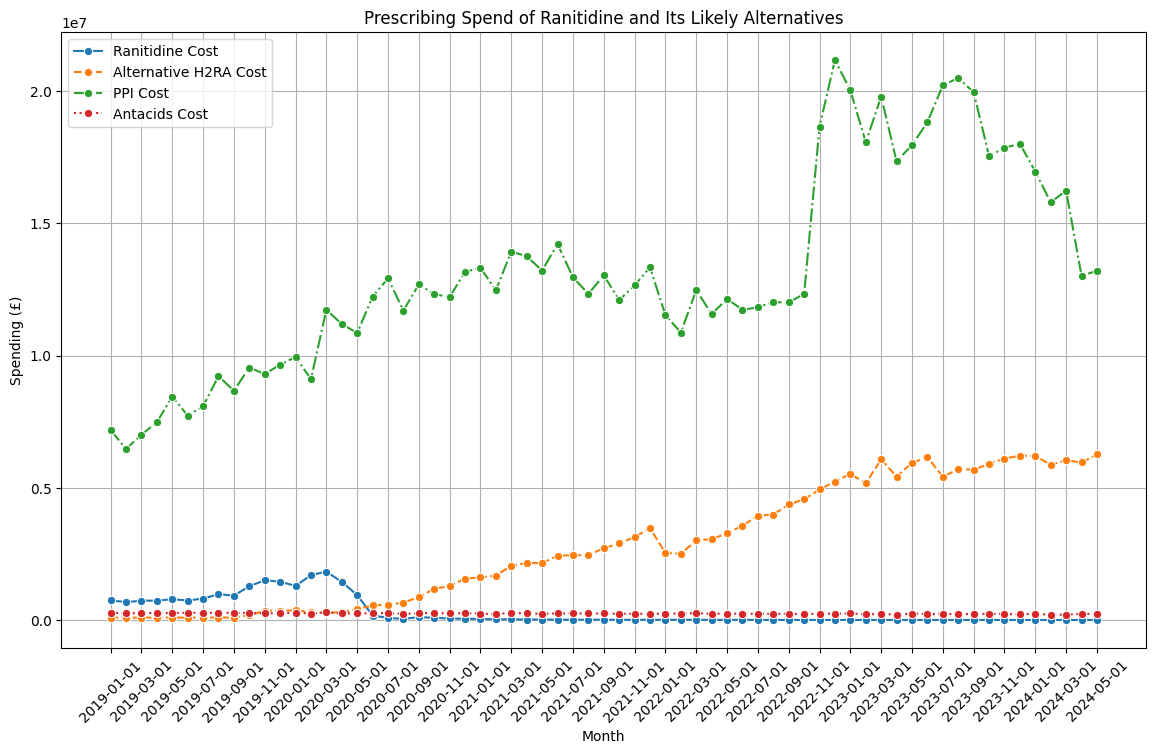

In [20]:
#Create Seaborn Figure for Monthly Costs
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for H2RA antagonists using Seaborn
sns.lineplot(data=ranitidine_monthly_cost, x='month', y='actual_cost', marker='o', label='Ranitidine Cost')
 
sns.lineplot(data=alternative_H2RA_monthly_cost, x='month', y='actual_cost', marker='o', linestyle='--', label='Alternative H2RA Cost')

sns.lineplot(data=PPI_monthly_cost, x='month', y='actual_cost', marker='o', linestyle='-.', label='PPI Cost')

sns.lineplot(data=antacids_monthly_cost, x='month', y='actual_cost', marker='o', linestyle=':', label='Antacids Cost')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Prescribing Spend of Ranitidine and Its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Spending (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()


#### 3 Most Commonly Prescribed Formulations

In [38]:
#To find 3 most commonly prescribed formulations of each chemical

def identify_top_5(data_filtered_chemical):
    chemical_items_by_code = data_filtered_chemical.groupby('bnf_code')['items'].sum().reset_index() #group by bnf_code
    sorted_chemicals = chemical_items_by_code.sort_values(by='items', ascending = False) #sort in descending order
    top_5_bnf_codes = sorted_chemicals.head(5) #create a dataframe of the top 5 codes and items
    
    print (top_5_bnf_codes)
    return top_5_bnf_codes

In [46]:
top_5_cimetidine = identify_top_5(data_filtered_cimetidine)
top_5_nizatidine = identify_top_5(data_filtered_nizatidine)
top_5_famotidine = identify_top_5(data_filtered_famotidine)
top_5_esomeprazole = identify_top_5(data_filtered_esomeprazole)
top_5_lansoprazole = identify_top_5(data_filtered_lansoprazole)
top_5_omeprazole = identify_top_5(data_filtered_omeprazole)
top_5_pantoprazole = identify_top_5(data_filtered_pantoprazole)
top_5_rabeprazole = identify_top_5(data_filtered_rabeprazole)
top_5_antacids = identify_top_5(data_filtered_antacids)
#need to remove liquid formulations after this before calculating price per unit.

          bnf_code   items
1  0103010D0AAABAB  336080
0  0103010D0AAAAAA   41351
3  0103010D0AAADAD   26757
5  0103010D0AAALAL   20454
2  0103010D0AAACAC    7262
          bnf_code   items
0  0103010N0AAAAAA  330825
1  0103010N0AAABAB  164020
2  0103010N0AAADAD       1
          bnf_code    items
0  0103010H0AAAAAA  4509403
1  0103010H0AAABAB  1515208
          bnf_code    items
0  0103050E0AAAAAA  3696193
1  0103050E0AAABAB  3299761
4  0103050E0AAAFAF  3215067
5  0103050E0AAAGAG  2451290
6  0103050E0BBAAAA   217306
           bnf_code      items
0   0103050L0AAAAAA  100048936
1   0103050L0AAABAB   62127994
3   0103050L0AAAHAH    4081391
2   0103050L0AAAGAG    1956004
22  0103050L0BBAEAH     290721
           bnf_code      items
0   0103050P0AAAAAA  165858175
2   0103050P0AAAFAF   11253108
1   0103050P0AAAEAE    5231752
7   0103050P0AAANAN    1316868
18  0103050P0AABDBD    1043495
          bnf_code    items
0  0103050R0AAAAAA  4337299
1  0103050R0AAABAB  4297500
4  0103050R0BCAAAB    

In [47]:
# Create function for calculating prices of the formulations

def price_per_quantity(cimetidine1):
    cimetidine1_grouped = cimetidine1.groupby('month')[['bnf_name', 'actual_cost', 'quantity']].sum().reset_index()
    cimetidine1_grouped['price_per_quantity'] = cimetidine1_grouped['actual_cost']/cimetidine1_grouped['quantity']

    return cimetidine1_grouped #month, bnf name, cost, quantity, price_per_quantity

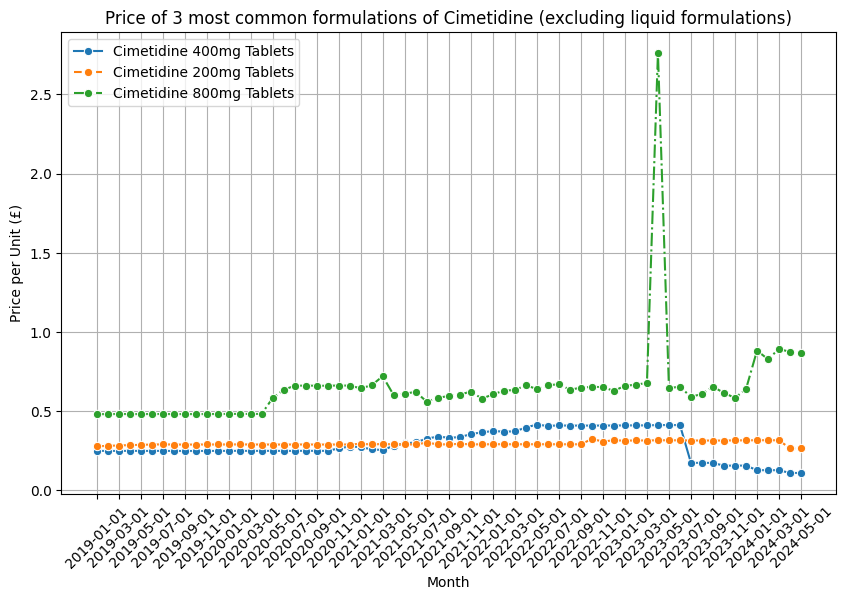

In [53]:
#Create Seaborn Figure for 3 Most Common Formulations of Cimetidine

#filter for rows of top 3 codes 
#creates a boolean mask where only rows with that code are true. then filters for those rows.
cimetidine1 = gi_df[gi_df['bnf_code'] == '0103010D0AAABAB']
cimetidine2 = gi_df[gi_df['bnf_code'] == '0103010D0AAAAAA']
cimetidine3 = gi_df[gi_df['bnf_code'] == '0103010D0AAACAC']

#Apply price_per_quantity
cimetidine1_grouped = price_per_quantity(cimetidine1)
cimetidine2_grouped = price_per_quantity(cimetidine2)
cimetidine3_grouped = price_per_quantity(cimetidine3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=cimetidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Cimetidine 400mg Tablets')
 
sns.lineplot(data=cimetidine2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Cimetidine 200mg Tablets')

sns.lineplot(data=cimetidine3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Cimetidine 800mg Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=cimetidine1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Cimetidine (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

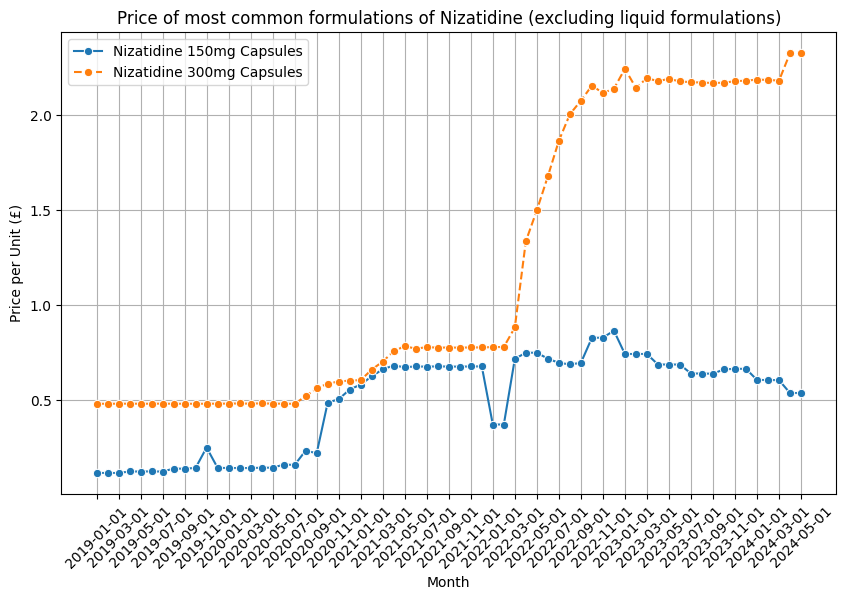

In [54]:
#Create Seaborn Figure for 3 Most Common Formulations of Nizatidine

#filter for rows of top 3 codes 
nizatidine1 = gi_df[gi_df['bnf_code'] == '0103010N0AAAAAA']
nizatidine2 = gi_df[gi_df['bnf_code'] == '0103010N0AAABAB']

#Apply price_per_quantity
nizatidine1_grouped = price_per_quantity(nizatidine1)
nizatidine2_grouped = price_per_quantity(nizatidine2)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of nizatidine
sns.lineplot(data=nizatidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Nizatidine 150mg Capsules')
 
sns.lineplot(data=nizatidine2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Nizatidine 300mg Capsules')


 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=nizatidine1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of most common formulations of Nizatidine (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

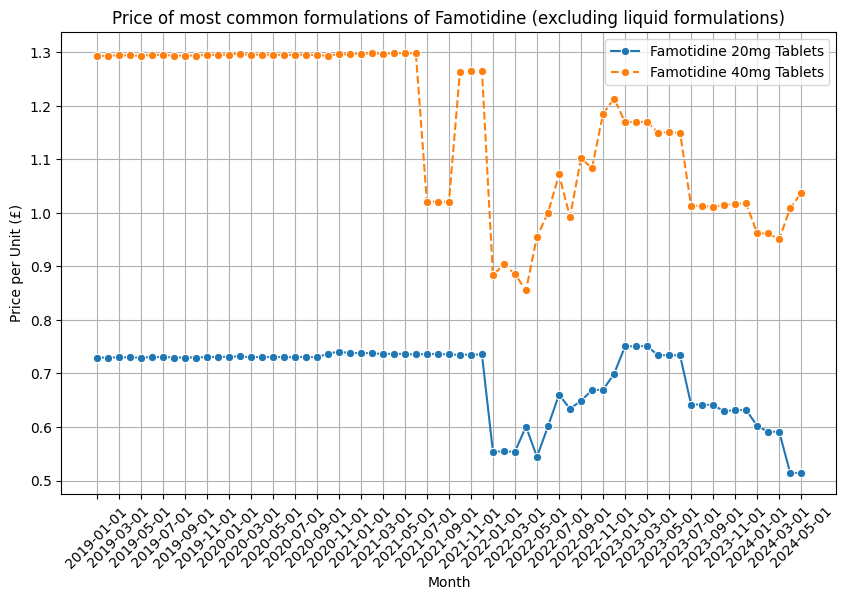

In [55]:
#Create Seaborn Figure for 3 Most Common Formulations of Famotidine

#filter for rows of top 3 codes 
famotidine1 = gi_df[gi_df['bnf_code'] == '0103010H0AAAAAA']
famotidine2 = gi_df[gi_df['bnf_code'] == '0103010H0AAABAB']

#Apply price_per_quantity
famotidine1_grouped = price_per_quantity(famotidine1)
famotidine2_grouped = price_per_quantity(famotidine2)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=famotidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Famotidine 20mg Tablets')
 
sns.lineplot(data=famotidine2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Famotidine 40mg Tablets')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=famotidine1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of most common formulations of Famotidine (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

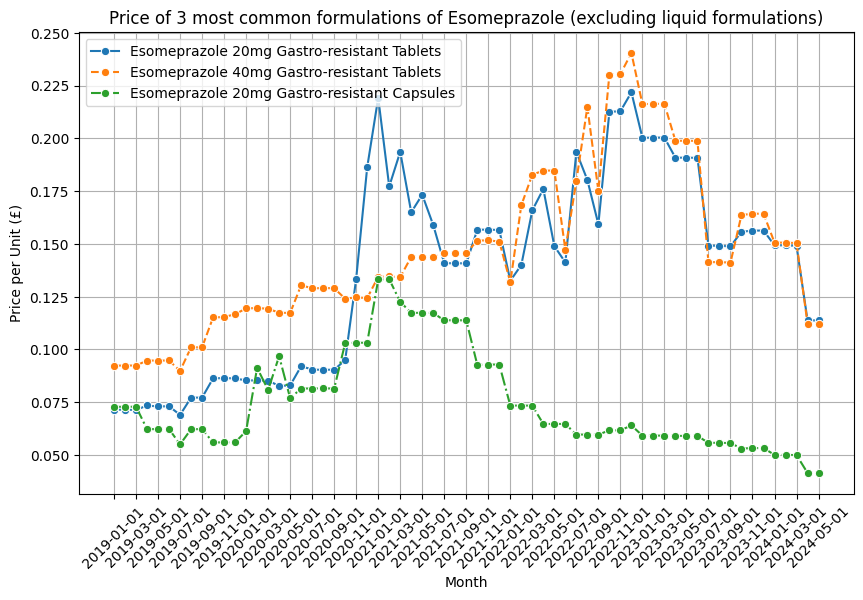

In [56]:
#Create Seaborn Figure for 3 Most Common Formulations of Esomeprazole

#filter for rows of top 3 codes 
esomeprazole1 = gi_df[gi_df['bnf_code'] == '0103050E0AAAAAA'] # 	Esomeprazole 20mg gastro-resistant tablets
esomeprazole2 = gi_df[gi_df['bnf_code'] == '0103050E0AAABAB'] #Esomeprazole 40mg gastro-resistant tablets
esomeprazole3 = gi_df[gi_df['bnf_code'] == '0103050E0AAAFAF'] #Esomeprazole 20mg gastro-resistant capsules

#Apply price_per_quantity
esomeprazole1_grouped = price_per_quantity(esomeprazole1)
esomeprazole2_grouped = price_per_quantity(esomeprazole2)
esomeprazole3_grouped = price_per_quantity(esomeprazole3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=esomeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Esomeprazole 20mg Gastro-resistant Tablets')
 
sns.lineplot(data=esomeprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Esomeprazole 40mg Gastro-resistant Tablets')

sns.lineplot(data=esomeprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Esomeprazole 20mg Gastro-resistant Capsules')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=esomeprazole1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Esomeprazole (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

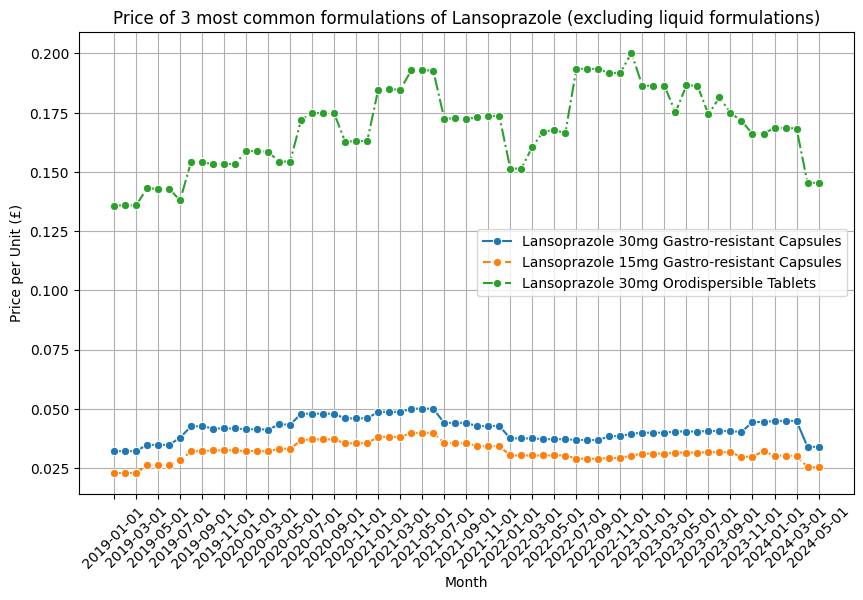

In [57]:
#Create Seaborn Figure for 3 Most Common Formulations of Lansoprazole

#filter for rows of top 3 codes 
lansoprazole1 = gi_df[gi_df['bnf_code'] == '0103050L0AAAAAA'] #Lansoprazole 30mg gastro-resistant capsules
lansoprazole2 = gi_df[gi_df['bnf_code'] == '0103050L0AAABAB'] #	Lansoprazole 15mg gastro-resistant capsules
lansoprazole3 = gi_df[gi_df['bnf_code'] == '0103050L0AAAHAH'] #	Lansoprazole 30mg orodispersible tablets

#Apply price_per_quantity
lansoprazole1_grouped = price_per_quantity(lansoprazole1)
lansoprazole2_grouped = price_per_quantity(lansoprazole2)
lansoprazole3_grouped = price_per_quantity(lansoprazole3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=lansoprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Lansoprazole 30mg Gastro-resistant Capsules')
 
sns.lineplot(data=lansoprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Lansoprazole 15mg Gastro-resistant Capsules')

sns.lineplot(data=lansoprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Lansoprazole 30mg Orodispersible Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=lansoprazole1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Lansoprazole (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

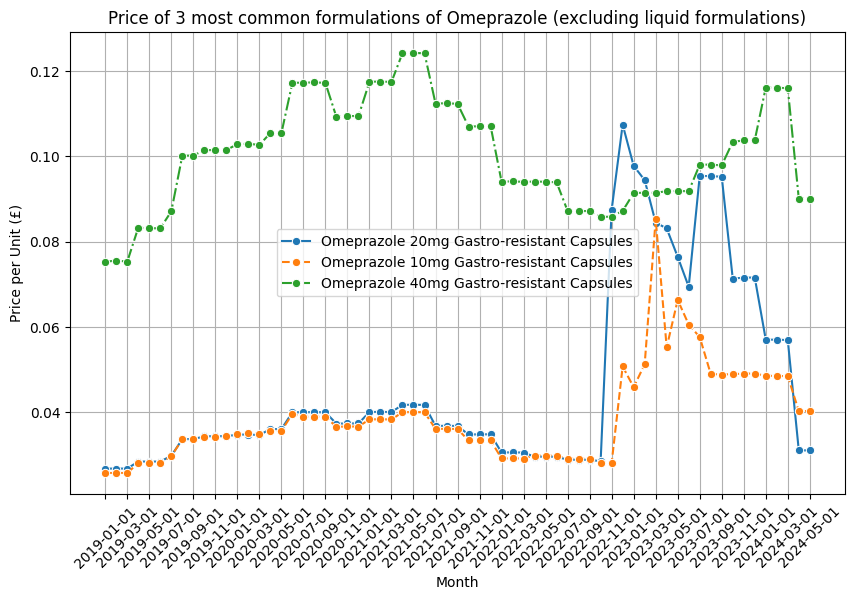

In [58]:
#Create Seaborn Figure for 3 Most Common Formulations of Omeprazole

#filter for rows of top 3 codes 
omeprazole1 = gi_df[gi_df['bnf_code'] == '0103050P0AAAAAA'] #Omeprazole 20mg gastro-resistant capsules
omeprazole2 = gi_df[gi_df['bnf_code'] == '0103050P0AAAFAF'] #Omeprazole 10mg gastro-resistant capsules
omeprazole3 = gi_df[gi_df['bnf_code'] == '0103050P0AAAEAE'] #Omeprazole 40mg gastro-resistant capsules

#Apply price_per_quantity
omeprazole1_grouped = price_per_quantity(omeprazole1)
omeprazole2_grouped = price_per_quantity(omeprazole2)
omeprazole3_grouped = price_per_quantity(omeprazole3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=omeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Omeprazole 20mg Gastro-resistant Capsules')
 
sns.lineplot(data=omeprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Omeprazole 10mg Gastro-resistant Capsules')

sns.lineplot(data=omeprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Omeprazole 40mg Gastro-resistant Capsules')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=omeprazole1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Omeprazole (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

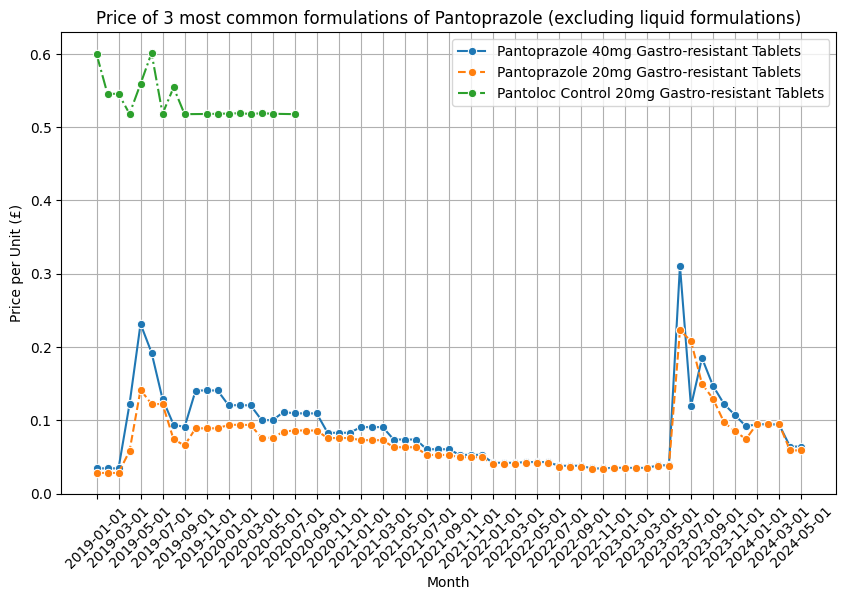

In [61]:
#Create Seaborn Figure for 3 Most Common Formulations of Pantoprazole

#filter for rows of top 3 codes 
pantoprazole1 = gi_df[gi_df['bnf_code'] == '0103050R0AAAAAA']
pantoprazole2 = gi_df[gi_df['bnf_code'] == '0103050R0AAABAB']
pantoprazole3 = gi_df[gi_df['bnf_code'] == '0103050R0BCAAAB']

#Apply price_per_quantity
pantoprazole1_grouped = price_per_quantity(pantoprazole1)
pantoprazole2_grouped = price_per_quantity(pantoprazole2)
pantoprazole3_grouped = price_per_quantity(pantoprazole3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=pantoprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Pantoprazole 40mg Gastro-resistant Tablets')
 
sns.lineplot(data=pantoprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Pantoprazole 20mg Gastro-resistant Tablets')

sns.lineplot(data=pantoprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Pantoloc Control 20mg Gastro-resistant Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=pantoprazole1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Pantoprazole (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

In [60]:
print(pantoprazole3_grouped)

         month                                           bnf_name  \
0   2019-01-01     Pantoloc Control 20mg gastro-resistant tablets   
1   2019-02-01  Pantoloc Control 20mg gastro-resistant tablets...   
2   2019-03-01  Pantoloc Control 20mg gastro-resistant tablets...   
3   2019-04-01  Pantoloc Control 20mg gastro-resistant tablets...   
4   2019-05-01  Pantoloc Control 20mg gastro-resistant tablets...   
5   2019-06-01  Pantoloc Control 20mg gastro-resistant tablets...   
6   2019-07-01  Pantoloc Control 20mg gastro-resistant tablets...   
7   2019-08-01  Pantoloc Control 20mg gastro-resistant tablets...   
8   2019-09-01     Pantoloc Control 20mg gastro-resistant tablets   
9   2019-11-01     Pantoloc Control 20mg gastro-resistant tablets   
10  2019-12-01  Pantoloc Control 20mg gastro-resistant tablets...   
11  2020-01-01  Pantoloc Control 20mg gastro-resistant tablets...   
12  2020-02-01     Pantoloc Control 20mg gastro-resistant tablets   
13  2020-03-01     Pantoloc Contro

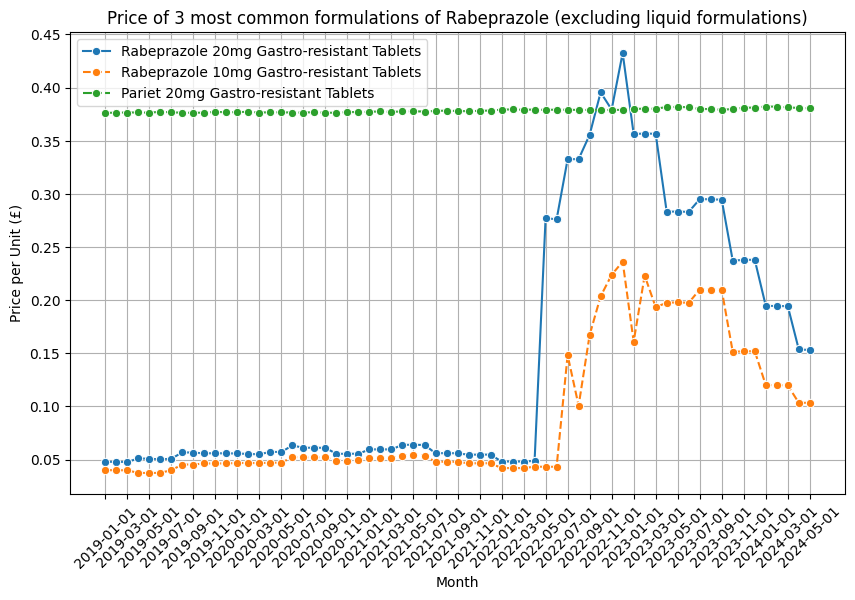

In [62]:
#Create Seaborn Figure for 3 Most Common Formulations of Rabeprazole

#filter for rows of top 3 codes 
rabeprazole1 = gi_df[gi_df['bnf_code'] == '0103050T0AAABAB']
rabeprazole2 = gi_df[gi_df['bnf_code'] == '0103050T0AAAAAA']
rabeprazole3 = gi_df[gi_df['bnf_code'] == '0103050T0BBABAB']

#Apply price_per_quantity
rabeprazole1_grouped = price_per_quantity(rabeprazole1)
rabeprazole2_grouped = price_per_quantity(rabeprazole2)
rabeprazole3_grouped = price_per_quantity(rabeprazole3)

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=rabeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Rabeprazole 20mg Gastro-resistant Tablets')
 
sns.lineplot(data=rabeprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Rabeprazole 10mg Gastro-resistant Tablets')

sns.lineplot(data=rabeprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Pariet 20mg Gastro-resistant Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=rabeprazole1_grouped['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Price of 3 most common formulations of Rabeprazole (excluding liquid formulations)')
plt.xlabel('Month')
plt.ylabel('Price per Unit (£)')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

#### Local Level Analysis

In [1]:
import geopandas as gpd

In [14]:
# Baseline and 6 months after shortage - filter data
april_2019 = gi_df[(gi_df['month'] == '2019-04-01')]
april_2020 = gi_df[(gi_df['month'] == '2020-04-01')]

# Aggregate Ranitidine and PPI data for April 2019 and April 2020 by CCG
# join with practices to get CCG for each practice
gi_df_ccg = gi_df.merge(practices_df[['code', 'ccg_id']], left_on='practice', right_on='code', how='left')

gi_df_ccg.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost,code,ccg_id
0,2023-04-01,36L,H83611,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,280.0,27.20,25.70305,H83611,36L
1,2023-04-01,B2M3M,M86001,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,252.0,24.48,23.14266,M86001,B2M3M
2,2023-04-01,W2U3Z,E85696,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,140.0,13.60,12.91352,E85696,W2U3Z
3,2023-04-01,99F,F81061,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,258.0,25.06,23.80102,F81061,99F
4,2023-04-01,15E,M85164,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,364.0,35.36,33.39660,M85164,15E


In [17]:
#Filter ranitidine and PPI data using the gi_df_ccg dataframe
data_filtered_ranitidine_ccg = bnf_code_filter(gi_df_ccg, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)
data_filtered_PPI_ccg = bnf_code_filter(gi_df_ccg, 'bnf_code', PPI_code, PPI_exclude_codes)


In [18]:
# Aggregate by CCG for April 2019 and April 2020
ranitidine_2019 = data_filtered_ranitidine_ccg[data_filtered_ranitidine_ccg['month'] == '2019-04-01'].groupby('ccg_id')['items'].sum().reset_index(name='ranitidine_2019')
ppi_2019 = data_filtered_PPI_ccg[data_filtered_PPI_ccg['month'] == '2019-04-01'].groupby('ccg_id')['items'].sum().reset_index(name='ppi_2019')
ppi_2020 = data_filtered_PPI_ccg[data_filtered_PPI_ccg['month'] == '2020-04-01'].groupby('ccg_id')['items'].sum().reset_index(name='ppi_2020')

print(ppi_2020)


    ccg_id  ppi_2020
0      00L     48940
1      00N     22361
2      00P     50422
3      00Q     17579
4      00R     25664
..     ...       ...
202    RYW         4
203    RYX        43
204    RYY         3
205  W2U3Z    148286
206  X2C4Y     44534

[207 rows x 2 columns]


In [28]:
#including the CCGs in London
london_ccg = ["08H", "07L", "07M", "07N", "08M", "07P", "07Q", "07R", "09A", "07T", "07V", "07X", "07W", "08A", "08C", "08D", "08E", "08F", "08G", "07Y", "08J", "08K", "08L", "08R", "08Q", "08T", "08V", "08W", "08X", "08Y", "08M", "08N", "08P"]
london_ccg = pd.DataFrame(london_ccg).set_index(0)

london_ccg_PPI_switch_rate = PPI_switch_rate.merge(london_ccg, how="inner",left_index=True,right_index=True)

london_ccg.head()

""
0
08H
07L
07M
07N
08M


In [19]:
# Calculating PPI Switch Rate
PPI_switch_rate = ppi_2019.merge(ppi_2020, on='ccg_id', how='left').merge(ranitidine_2019, on='ccg_id', how='left') #create switchrate dataframe

PPI_switch_rate['ppi_switch_rate'] = (ppi_2020['ppi_2020'] - ppi_2019['ppi_2019']) / ranitidine_2019['ranitidine_2019']

#Account for NaN and positive / negative infinity
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].fillna(0)
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].replace([float('inf'), -float('inf')], 0)

PPI_switch_rate = PPI_switch_rate.set_index('ccg_id')

print (PPI_switch_rate)

        ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate
ccg_id                                                      
00L        43295   48940.0           3718.0         1.518289
00N        20779   22361.0           1927.0         0.820965
00P        46342   50422.0           3306.0         1.234120
00Q        17419   17579.0           1528.0         0.104712
00R        23974   25664.0           2206.0         0.766092
...          ...       ...              ...              ...
RYW            4       4.0              NaN         0.000000
RYX           13      43.0              6.0         0.000000
RYY            2       3.0              1.0         0.000000
W2U3Z     133753  148286.0          15311.0         0.000000
X2C4Y      39898   44534.0           3958.0         0.000000

[214 rows x 4 columns]


In [26]:
print(london_ccg.index)


Index(['08H', '07L', '07M', '07N', '08M', '07P', '07Q', '07R', '09A', '07T',
       '07V', '07X', '07W', '08A', '08C', '08D', '08E', '08F', '08G', '07Y',
       '08J', '08K', '08L', '08R', '08Q', '08T', '08V', '08W', '08X', '08Y',
       '08M', '08N', '08P'],
      dtype='object', name=0)


In [20]:
# 15 If don't exist locally, get GeoJSON and codes for ICBs and SICBLs (April 2023)
sicbl_geojson_path = os.path.join("..","data","sicbl_geojson.geojson")
sicbl_codes_path = os.path.join("..","data","sicbl_codes.csv")
icb_geojson_path = os.path.join("..","data","icb_geojson.geojson")
icb_codes_path = os.path.join("..","data","icb_codes.csv")

# Check if files exist, and if not, download and save them
if not os.path.exists(sicbl_geojson_path):
    sicbl_gdf = gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Sub_Integrated_Care_Board_Locations_April_2023_EN_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson').to_crs('epsg:27700')
    sicbl_gdf.to_file(sicbl_geojson_path, driver='GeoJSON')
else:
    sicbl_gdf = gpd.read_file(sicbl_geojson_path)

if not os.path.exists(sicbl_codes_path):
    sicbl_codes_df = pd.read_csv('https://open-geography-portalx-ons.hub.arcgis.com/api/download/v1/items/db9328469faa4fd9badfb532dfbcb32b/csv?layers=0')
    sicbl_codes_df.to_csv(sicbl_codes_path, index=False)
else:
    sicbl_codes_df = pd.read_csv(sicbl_codes_path)

if not os.path.exists(icb_geojson_path):
    icb_gdf = gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/ArcGIS/rest/services/Integrated_Care_Boards_April_2023_EN_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson').to_crs('epsg:27700')
    icb_gdf.to_file(icb_geojson_path, driver='GeoJSON')
else:
    icb_gdf = gpd.read_file(icb_geojson_path)

if not os.path.exists(icb_codes_path):
    icb_codes_df = pd.read_csv('https://open-geography-portalx-ons.hub.arcgis.com/api/download/v1/items/6924fa126d7a428782eda4b374b6d734/csv?layers=0')
    icb_codes_df.to_csv(icb_codes_path, index=False)
else:
    icb_codes_df = pd.read_csv(icb_codes_path)

In [7]:
sicbl_gdf.head()

,FID,SICBL23CD,SICBL23NM,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E38000006,NHS South Yorkshire ICB - 02P,429979,403330,-1.549250,53.52580,3.290905e+08,123174.329795,8a7dd53d-9ae1-4b6a-a637-a9635e13b6d0,"POLYGON ((436695.380 413060.416, 436833.554 41..."
1,2,E38000007,NHS Mid and South Essex ICB - 99E,564014,194421,0.368068,51.62470,2.630960e+08,124621.273962,bd7fdae4-3299-406d-8878-eb3e4b128af3,"MULTIPOLYGON (((576455.946 184831.054, 576419...."
2,3,E38000008,NHS Nottingham and Nottinghamshire ICB - 02Q,468073,384833,-0.978700,53.35602,6.379281e+08,156982.515587,8f66b34d-3a17-42e3-83bb-d54eff0380eb,"MULTIPOLYGON (((482031.023 373913.662, 482015...."
3,4,E38000014,NHS Lancashire and South Cumbria ICB - 00Q,369490,422806,-2.463600,53.70080,1.370511e+08,63674.255512,f253dc00-46af-4024-8c01-47e930497862,"POLYGON ((369403.109 431710.186, 369499.116 43..."
4,5,E38000015,NHS Lancashire and South Cumbria ICB - 00R,332819,436634,-3.021990,53.82163,3.489997e+07,33917.243230,d8ecae8a-de94-411c-83aa-0a1f1647d0d6,"POLYGON ((333032.848 438380.778, 333037.180 43..."


In [33]:
# 16 Merge map data with switch rates
switchrate_ccg_merge_df = pd.merge(PPI_switch_rate, ccg_df, left_on='ccg_id', right_on='code', how='left')
switchrate_ccg_maps_gdf = sicbl_gdf.merge(switchrate_ccg_merge_df, left_on='SICBL23CD', right_on='ons_code', how='inner')
print (switchrate_ccg_maps_gdf)

In [29]:
switchrate_ccg_merge_df.head()

,ppi_2019,ppi_2020,ranitidine_2019,ppi_switch_rate,code,name,ons_code,org_type,open_date,close_date,address,postcode,stp_id,regional_team_id
0,43295,48940.0,3718.0,1.518289,00L,NHS NORTHUMBERLAND,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"THE RIVERGREEN CENTRE, ST. MARY LANE, ST. MARY...",NE61 6BL,QHM,Y63
1,20779,22361.0,1927.0,0.820965,00N,NHS SOUTH TYNESIDE,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"MONKTON HALL, MONKTON LANE, MONKTON VILLAGE, J...",NE32 5NN,QHM,Y63
2,46342,50422.0,3306.0,1.234120,00P,NHS SUNDERLAND,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"PEMBERTON HOUSE, COLIMA AVENUE, SUNDERLAND ENT...",SR5 3XB,QHM,Y63
3,17419,17579.0,1528.0,0.104712,00Q,NHS BLACKBURN WITH DARWEN,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"FUSION HOUSE, EVOLUTION PARK, HASLINGDEN ROAD,...",BB1 2FD,QE1,Y62
4,23974,25664.0,2206.0,0.766092,00R,NHS BLACKPOOL,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"THE STADIUM, SEASIDERS WAY, BLACKPOOL",FY1 6JX,QE1,Y62


In [24]:
switchrate_ccg_maps_gdf.head()

,FID,SICBL23CD,SICBL23NM,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,...,code,name,ons_code,org_type,open_date,close_date,address,postcode,stp_id,regional_team_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00L,NHS NORTHUMBERLAND,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"THE RIVERGREEN CENTRE, ST. MARY LANE, ST. MARY...",NE61 6BL,QHM,Y63
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00N,NHS SOUTH TYNESIDE,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"MONKTON HALL, MONKTON LANE, MONKTON VILLAGE, J...",NE32 5NN,QHM,Y63
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00P,NHS SUNDERLAND,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"PEMBERTON HOUSE, COLIMA AVENUE, SUNDERLAND ENT...",SR5 3XB,QHM,Y63
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00Q,NHS BLACKBURN WITH DARWEN,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"FUSION HOUSE, EVOLUTION PARK, HASLINGDEN ROAD,...",BB1 2FD,QE1,Y62
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00R,NHS BLACKPOOL,NaN,CCG,2013-04-01 00:00:00+00:00,NaN,"THE STADIUM, SEASIDERS WAY, BLACKPOOL",FY1 6JX,QE1,Y62


In [ ]:
# 17 Create choropleths

#define attributes
colormap = 'seismic_r'
min_value = 0
max_value = max(switchrate_ccg_maps_gdf['percentage'].max(), icb_maps_gdf['ppi_switch_rate'].max()) # maximum value from whichever df has the larger value, to set shared colormap

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 12))

# Plot the SICBL choropleth
sicbl_maps_gdf.plot(ax=axs[0], column='percentage', legend=False, figsize=(12, 12), cmap=colormap, vmin=min_value, vmax=max_value, edgecolor='black', linewidth=0.3).set_axis_off()
axs[0].set_title('CCG location')

# Add a shared colorbar with a shared legend
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust position as needed
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=max_value))  # You can specify the colormap here
plt.colorbar(sm, cax=cax, label="percentage of practices", format=FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add a single title for both maps across the top
fig.suptitle('Percentage of practices with at least one alert signup\n(excluding analyse page alerts)', fontsize=16)

#show the plot and save it
plt.savefig(os.path.join("..","data","practice_signup_map.png"), dpi=300)
plt.show()

#### Decile Charts

In [67]:
# Aggregate by practice for July 2019 and July 2020
ranitidine_2019 = data_filtered_ranitidine[data_filtered_ranitidine['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='ranitidine_2019')
ppi_2019 = data_filtered_PPI[data_filtered_PPI['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='ppi_2019')
ppi_2020 = data_filtered_PPI[data_filtered_PPI['month'] == '2020-07-01'].groupby('practice')['items'].sum().reset_index(name='ppi_2020')
print(ppi_2020)

     practice  ppi_2020
0      A81001       501
1      A81002      2448
2      A81004      1061
3      A81005      1318
4      A81006      2056
...       ...       ...
7467   Y06826         5
7468   Y06830         1
7469   Y06837         8
7470   Y06845        21
7471   Y06856         5

[7472 rows x 2 columns]


In [68]:
# Calculating PPI Switch Rate
PPI_switch_rate = ppi_2019.merge(ppi_2020, on='practice', how='left').merge(ranitidine_2019, on='practice', how='left') #create switchrate dataframe

PPI_switch_rate['ppi_switch_rate'] = (PPI_switch_rate['ppi_2020'] - PPI_switch_rate['ppi_2019']) / PPI_switch_rate['ranitidine_2019']

#Account for NaN and positive / negative infinity
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].fillna(0)
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].replace([float('inf'), -float('inf')], 0)

#fillna 0 for all of these cases. 


print (PPI_switch_rate)

     practice  ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate
0      A81001       429     501.0             35.0         2.057143
1      A81002      2236    2448.0            172.0         1.232558
2      A81004       954    1061.0             51.0         2.098039
3      A81005      1148    1318.0             70.0         2.428571
4      A81006      1873    2056.0            142.0         1.288732
...       ...       ...       ...              ...              ...
7843   Y06450         3       3.0              NaN         0.000000
7844   Y06451         1       2.0              NaN         0.000000
7845   Y06492         5       1.0              NaN         0.000000
7846   Y06494         2       NaN              NaN         0.000000
7847   Y06502         1       NaN              NaN         0.000000

[7848 rows x 5 columns]


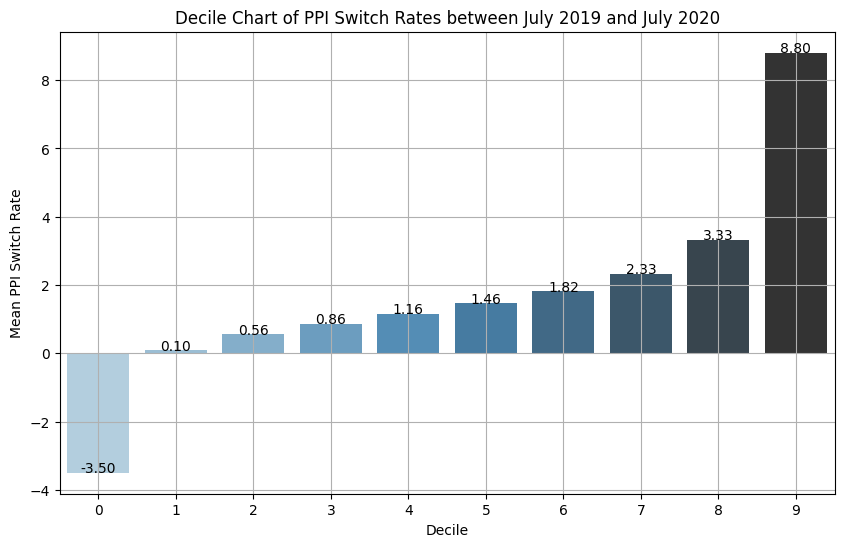

In [86]:
# Step 1: Clean the data by removing NaN values from the 'ppi_switch_rate' column. only rows that have values for both timepoints will remain.
PPI_switch_rate_cleaned = PPI_switch_rate.dropna().copy()

# Step 2: Calculate the deciles
PPI_switch_rate_cleaned.loc[:, 'decile'] = pd.qcut(PPI_switch_rate_cleaned['ppi_switch_rate'], 10, labels=False)
#.loc is to specifically select decile column and avoid errors.

# Step 3: Group by decile and calculate the mean ppi_switch_rate for each decile
PPI_decile_summary = PPI_switch_rate_cleaned.groupby('decile')['ppi_switch_rate'].mean()

# Step 4: Plot the decile chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=PPI_decile_summary.index, y=PPI_decile_summary.values, hue=PPI_decile_summary.index, palette="Blues_d", legend=False)

# Customize the chart
plt.title('Decile Chart of PPI Switch Rates between July 2019 and July 2020')
plt.xlabel('Decile')
plt.ylabel('Mean PPI Switch Rate')
plt.grid(True)

# Annotate the bars with mean switch rates
for i in range(len(PPI_decile_summary)):
    plt.text(i, PPI_decile_summary.values[i], f"{PPI_decile_summary.values[i]:.2f}", ha="center")

# Show the plot
plt.show()

In [71]:
#Doing the same for alternative H2RAs

#aggregating by practice for July 2019 and 2020
H2RA_2019 = data_filtered_alternative_H2RA[data_filtered_alternative_H2RA['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='H2RA_2019')
H2RA_2020 = data_filtered_alternative_H2RA[data_filtered_alternative_H2RA['month'] == '2020-07-01'].groupby('practice')['items'].sum().reset_index(name='H2RA_2020')

#Calculating H2RA switch rate 
H2RA_switch_rate = H2RA_2019.merge(H2RA_2020, on='practice', how='left').merge(ranitidine_2019, on='practice', how='left') #create switchrate dataframe

H2RA_switch_rate['H2RA_switch_rate'] = (H2RA_switch_rate['H2RA_2020'] - H2RA_switch_rate['H2RA_2019']) / H2RA_switch_rate['ranitidine_2019']

#Account for NaN and positive / negative infinity
H2RA_switch_rate['H2RA_switch_rate'] = H2RA_switch_rate['H2RA_switch_rate'].fillna(0)
H2RA_switch_rate['H2RA_switch_rate'] = H2RA_switch_rate['H2RA_switch_rate'].replace([float('inf'), -float('inf')], 0)

#fillna 0 for all of these cases. 

print (H2RA_switch_rate)

     practice  H2RA_2019  H2RA_2020  ranitidine_2019  H2RA_switch_rate
0      A81004          3        5.0             51.0          0.039216
1      A81006          1        4.0            142.0          0.021127
2      A81011          4        3.0             99.0         -0.010101
3      A81013          1       11.0             95.0          0.105263
4      A81014          2        NaN             54.0          0.000000
...       ...        ...        ...              ...               ...
2296   Y05733          2        3.0             70.0          0.014286
2297   Y05887          1        NaN              1.0          0.000000
2298   Y06007          1        3.0             54.0          0.037037
2299   Y06218          2        4.0             40.0          0.050000
2300   Y06356          2        1.0             53.0         -0.018868

[2301 rows x 5 columns]


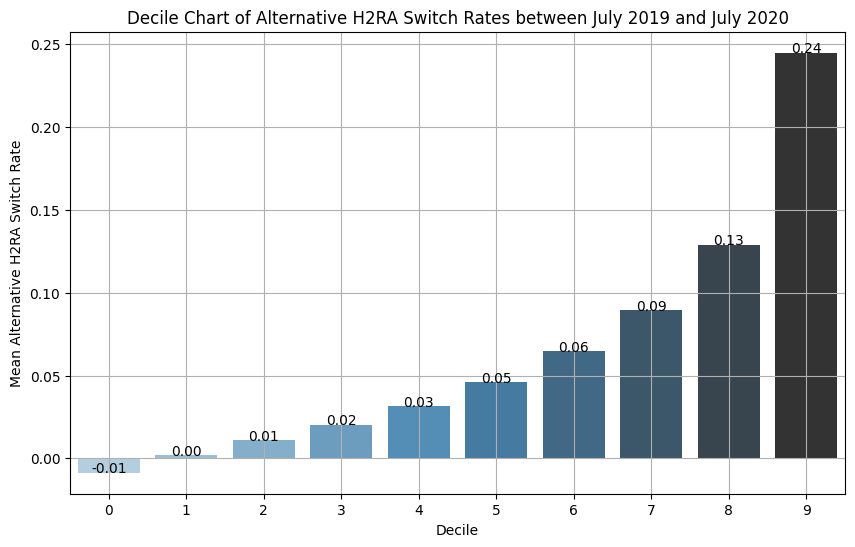

In [87]:
# Step 1: Clean the data by removing NaN values from the 'H2RA_switch_rate' column. only rows that have values for both timepoints will remain.
H2RA_switch_rate_cleaned = H2RA_switch_rate.dropna().copy()

# Step 2: Calculate the deciles
H2RA_switch_rate_cleaned.loc[:, 'decile'] = pd.qcut(H2RA_switch_rate_cleaned['H2RA_switch_rate'], 10, labels=False)
#.loc is to specifically select decile column and avoid errors.

# Step 3: Group by decile and calculate the mean ppi_switch_rate for each decile
H2RA_decile_summary = H2RA_switch_rate_cleaned.groupby('decile')['H2RA_switch_rate'].mean()

# Step 4: Plot the decile chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=H2RA_decile_summary.index, y=H2RA_decile_summary.values, hue=H2RA_decile_summary.index, palette="Blues_d", legend=False)

# Customize the chart
plt.title('Decile Chart of Alternative H2RA Switch Rates between July 2019 and July 2020')
plt.xlabel('Decile')
plt.ylabel('Mean Alternative H2RA Switch Rate')
plt.grid(True)

# Annotate the bars with mean switch rates
for i in range(len(H2RA_decile_summary)):
    plt.text(i, H2RA_decile_summary.values[i], f"{H2RA_decile_summary.values[i]:.2f}", ha="center")

# Show the plot
plt.show()

In [31]:
#finding cumulative distribution for PPI switch rate
sorted_ppi_switch_rate = PPI_switch_rate.sort_values(by = 'ppi_switch_rate')

# Drop NaN values from the 'ppi_switch_rate' column and sort the entire DataFrame based on it
ppi_switch_rate_cleaned = sorted_ppi_switch_rate.dropna(subset=['ppi_switch_rate']).sort_values(by='ppi_switch_rate')

# Calculate the cumulative distribution for the 'ppi_switch_rate' column
cumulative_distribution_PPI = np.cumsum(ppi_switch_rate_cleaned['ppi_switch_rate'])

print (cumulative_distribution_PPI)

7350      -74.000000
7616     -135.000000
7523     -181.000000
7346     -218.000000
2812     -245.000000
            ...     
6643    11346.012560
1310    11429.103469
3268    11526.103469
7834    11644.103469
6204    11835.353469
Name: ppi_switch_rate, Length: 7848, dtype: float64


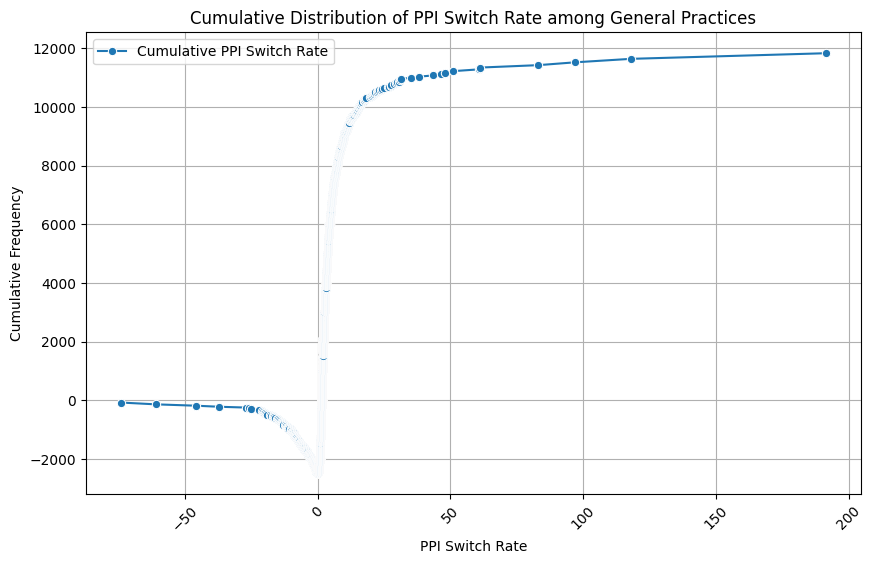

In [34]:
# Plot graph of the cumulative distribution of PPIs

plt.figure(figsize=(10, 6))  # Define Figure Size
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(x=ppi_switch_rate_cleaned['ppi_switch_rate'], y=cumulative_distribution_PPI, marker='o', label='Cumulative PPI Switch Rate')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Add titles and labels
plt.title('Cumulative Distribution of PPI Switch Rate among General Practices')
plt.xlabel('PPI Switch Rate')
plt.ylabel('Cumulative Frequency')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()